# How does healthcare quality change with region?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [6]:
!pip install matplotlib-venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32062 sha256=0f7607dda0444e1223fe9c45b65d5a06583dfabdc1c2eb040293561287bcc8f0
  Stored in directory: c:\users\ahmed\appdata\local\pip\cache\wheels\83\b1\0d\2f0c1d1b8ac6eb051dac0775adc44c8a83a0bf1dafc2b2becc
Successfully built matplotlib-venn


In [7]:
#Read Data
root_path='Cleaned_data/'
life_expectancy_df = pd.read_csv(root_path+'Life Expectancy Data.csv')
country_df = pd.read_csv(root_path+'250 Country Data.csv')

Intersection of countries


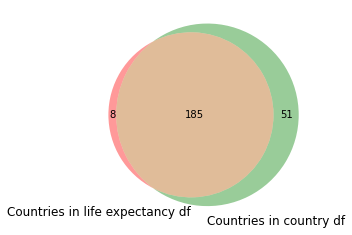

In [8]:
from matplotlib_venn import venn2
print("Intersection of countries")
plt.figure(figsize=(4,4))
set1 = set(life_expectancy_df['Country'])
set2 = set(country_df['name'])
venn2([set1, set2], ('Countries in life expectancy df', 'Countries in country df'))
plt.show()

185 countries in common between the 2 datasets, this is good as the big intersection means minimal data loss. Below we merge the 2 datasets

In [9]:
expectancy_country_df = pd.merge(life_expectancy_df, country_df, left_on = "Country", right_on="name")
expectancy_country_df = expectancy_country_df.loc[:, ~expectancy_country_df.columns.str.contains('^Unnamed')]
expectancy_country_df

,Country,Year,Status,HIV/AIDS Deaths,Disease,Life expectancy,Adult Mortality,Income composition of resources,Immunization coverage,GDP,Schooling,name,region,subregion,population,area
0,Afghanistan,2015,Developing,0.1,Hepatitis B,65.0,263.0,0.479,65.0,584.259210,10.1,Afghanistan,Asia,Southern Asia,27657145,652230.0
1,Afghanistan,2014,Developing,0.1,Hepatitis B,59.9,271.0,0.476,62.0,612.696514,10.0,Afghanistan,Asia,Southern Asia,27657145,652230.0
2,Afghanistan,2013,Developing,0.1,Hepatitis B,59.9,268.0,0.470,64.0,631.744976,9.9,Afghanistan,Asia,Southern Asia,27657145,652230.0
3,Afghanistan,2012,Developing,0.1,Hepatitis B,59.5,272.0,0.463,67.0,669.959000,9.8,Afghanistan,Asia,Southern Asia,27657145,652230.0
4,Afghanistan,2011,Developing,0.1,Hepatitis B,59.2,275.0,0.454,68.0,63.537231,9.5,Afghanistan,Asia,Southern Asia,27657145,652230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8425,Zimbabwe,2004,Developing,33.6,Diphtheria,44.3,723.0,0.407,65.0,454.366654,9.2,Zimbabwe,Africa,Eastern Africa,14240168,390757.0
8426,Zimbabwe,2003,Developing,36.7,Diphtheria,44.5,715.0,0.418,68.0,453.351155,9.5,Zimbabwe,Africa,Eastern Africa,14240168,390757.0
8427,Zimbabwe,2002,Developing,39.8,Diphtheria,44.8,73.0,0.427,71.0,57.348340,10.0,Zimbabwe,Africa,Eastern Africa,14240168,390757.0
8428,Zimbabwe,2001,Developing,42.1,Diphtheria,45.3,686.0,0.427,75.0,548.587312,9.8,Zimbabwe,Africa,Eastern Africa,14240168,390757.0


In order to be able to measure the quality of healthcare we engineer a new feature. We know that life expectancy and adult mortality are indicators of health, thus we combine them into a new feature.
We know that life expectancy and adult mortality are indicators of good health, and that means that the quality of healthcare in a country is good. We combine these 2 features to be a full indicator of the standard of health in a place.

Since the features have different scales, we scale them using min max scaler to be in the range of 1-2. Then we compute the healthcare index using the formula. 

$ \textrm{Health care Index} = \dfrac{\textrm{Life expectancy}}{\textrm{Adult mortality}} $

When this indicator is high, it indicates good quality of healthcare because this typically means high life expectancy and low adult mortality. A low number is a bad indicator. The value that this indicator adds is that we can have a measure of both adult mortality and life expectancy in one place. We have the power of both indicators instead of using just one of them which might give us a biased view.


In [10]:
scaler = MinMaxScaler(feature_range = [1,2])

expectancy_country_df["Health index"] = scaler.fit_transform(np.array(expectancy_country_df["Life expectancy"]).reshape(-1, 1))/ scaler.fit_transform(np.array(expectancy_country_df["Adult Mortality"]).reshape(-1, 1))

In [11]:
expectancy_country_df.head()

,Country,Year,Status,HIV/AIDS Deaths,Disease,Life expectancy,Adult Mortality,Income composition of resources,Immunization coverage,GDP,Schooling,name,region,subregion,population,area,Health index
0,Afghanistan,2015,Developing,0.1,Hepatitis B,65.0,263.0,0.479,65.0,584.259210,10.1,Afghanistan,Asia,Southern Asia,27657145,652230.0,1.137035
1,Afghanistan,2014,Developing,0.1,Hepatitis B,59.9,271.0,0.476,62.0,612.696514,10.0,Afghanistan,Asia,Southern Asia,27657145,652230.0,1.057113
2,Afghanistan,2013,Developing,0.1,Hepatitis B,59.9,268.0,0.470,64.0,631.744976,9.9,Afghanistan,Asia,Southern Asia,27657145,652230.0,1.060353
3,Afghanistan,2012,Developing,0.1,Hepatitis B,59.5,272.0,0.463,67.0,669.959000,9.8,Afghanistan,Asia,Southern Asia,27657145,652230.0,1.050502
4,Afghanistan,2011,Developing,0.1,Hepatitis B,59.2,275.0,0.454,68.0,63.537231,9.5,Afghanistan,Asia,Southern Asia,27657145,652230.0,1.043166


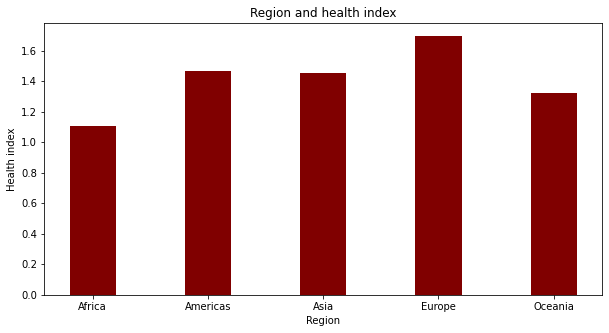

In [12]:
expectancy_country_df_copy_2015 = expectancy_country_df.copy(deep = True).drop_duplicates(subset = ["Country"], keep="first")
fig = plt.figure(figsize = (10, 5)) 


regions =["Africa" ,"Americas","Asia" ,"Europe","Oceania"]
values = expectancy_country_df_copy_2015.groupby(["region"])["Health index"].median()
# creating the bar plot 
plt.bar(regions, values, color ='maroon',   width = 0.4) 
  
plt.xlabel("Region") 
plt.ylabel("Health index") 
plt.title("Region and health index") 
plt.show() 

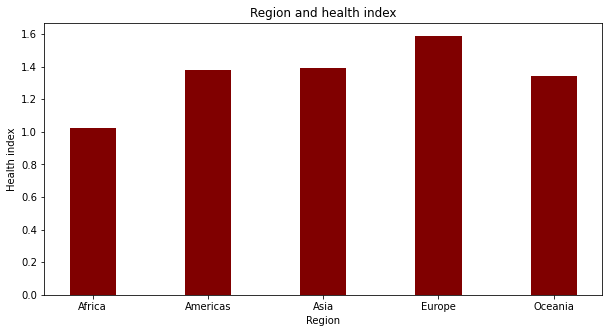

In [13]:

expectancy_country_df_copy_2000 = expectancy_country_df.copy(deep = True).drop_duplicates(subset = ["Country"], keep="last")
fig = plt.figure(figsize = (10, 5)) 


regions =["Africa" ,"Americas","Asia" ,"Europe","Oceania"]
values = expectancy_country_df_copy_2000.groupby(["region"])["Health index"].median()
# creating the bar plot 
plt.bar(regions, values, color ='maroon',   width = 0.4) 
  
plt.xlabel("Region") 
plt.ylabel("Health index") 
plt.title("Region and health index") 
plt.show() 

As we can see from the plots above there wasnt any drastic change in the health quality index median value of each region throughout years to 2000 to 2015 therefore we use the most recent data for the next sections

The health index is the highest in Europe and lowest in Africa. This reflects the fact that health quality is lowest in Africa and highest in Europe. Lets dig deeper and see how the subregions are doing.

In [14]:
expectancy_country_df_copy=expectancy_country_df_copy_2015

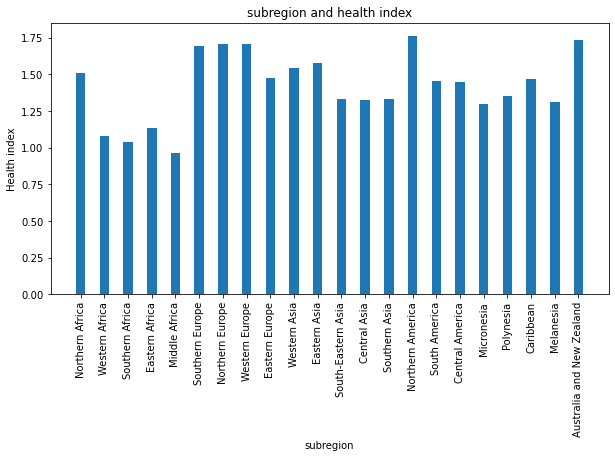

In [15]:
fig = plt.figure(figsize = (10, 5)) 
subregions =  np.sort(expectancy_country_df_copy.subregion.unique())
values = expectancy_country_df_copy.groupby(["subregion"])["Health index"].median()
#display(values)
dict_subregions = {}
for i in range(0,  len(values)):
    dict_subregions[str(subregions[i])] = values[i]
region_map =[]

for sub in subregions:
    sort_val = 4
    if("Africa" in sub):
        sort_val = 0
    if("Europe" in sub):
        sort_val = 1
    if("Asia" in sub):
        sort_val = 2
    if("America" in sub):
        sort_val = 3
    region_map.append([sort_val, sub, dict_subregions[str(sub)]])
region_map = pd.DataFrame(region_map, columns = ["region_key","subregion","health index"])
region_map=region_map.sort_values(by="region_key")

# creating the bar plot 
plt.bar(region_map["subregion"], region_map["health index"],   width = 0.4) 
  
plt.xlabel("subregion") 
plt.ylabel("Health index") 
plt.title("subregion and health index") 
plt.xticks(rotation=90)
plt.show() 


In the African region, the best performing subregion is northern africa, and the poorest performer is south africa. In Europe all subregions have a high performance and are close to each other, except Eastern Europe which has a lower performance in terms of the health quality index. Interestingly, North America performs better than all other subregions, but seemed to have a lower performance in the graph previous to this one. This is due to the fact that in the previous graph we grouped both Americas together and it is noted that South America has a performance lower than most Europian regions. In addition, Austrailia and New Zealand have a great performance too that is comparable to North America. Asian regions are in the middle between the African and American regions with central Asia performing the worst among the Asian regions.

#### Why could this be the case?

Lets explore some features and see how they correlate in each region

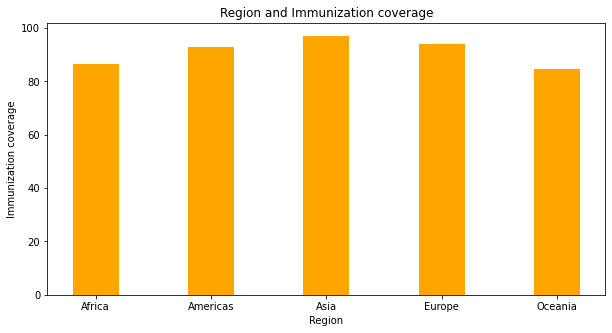

In [16]:
fig = plt.figure(figsize = (10, 5)) 
regions =["Africa" ,"Americas","Asia" ,"Europe","Oceania"]
values = expectancy_country_df_copy.groupby(["region"])["Immunization coverage"].median()
# creating the bar plot 
plt.bar(regions, values, color ='orange',   width = 0.4) 
  
plt.xlabel("Region") 
plt.ylabel("Immunization coverage") 
plt.title("Region and Immunization coverage") 
plt.show() 

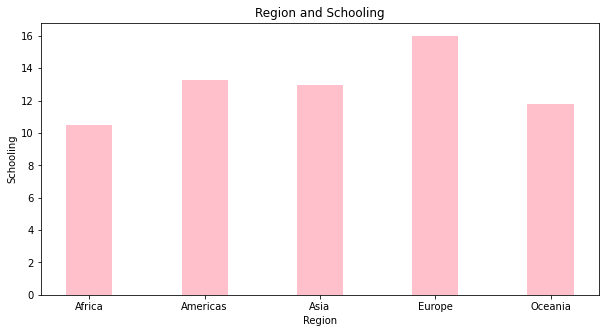

In [17]:
fig = plt.figure(figsize = (10, 5)) 
regions =["Africa" ,"Americas","Asia" ,"Europe","Oceania"]
values = expectancy_country_df_copy.groupby(["region"])["Schooling"].median()
# creating the bar plot 
plt.bar(regions, values, color ='pink',   width = 0.4) 
  
plt.xlabel("Region") 
plt.ylabel("Schooling") 
plt.title("Region and Schooling") 
plt.show() 

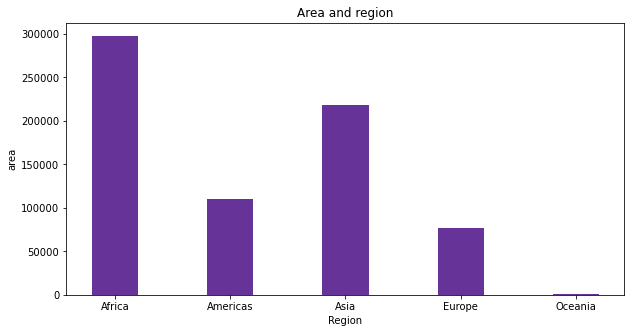

In [18]:
fig = plt.figure(figsize = (10, 5)) 
regions =["Africa" ,"Americas","Asia" ,"Europe","Oceania"]
values = expectancy_country_df_copy.groupby(["region"])["area"].median()
# creating the bar plot 
plt.bar(regions, values, color ='rebeccapurple',   width = 0.4) 
  
plt.xlabel("Region") 
plt.ylabel("area") 
plt.title("Area and region") 
plt.show() 

From the above graphs we can see that there is a strong correlation between immunization and health quality as the regions that vaccinate the most have a higher value for the health quality index. In addition years of schooling resemble some correlation because the regions with the lowest schooling years typically have lower health quality than those that have a higher number of  schooling years. Finally, area does not have a very strong relationship with the health quality. Regions with the smallest areas typically have higher health index values however as we can see Oceania region is significantly smaller than Asia however their health quality index is very similar.
Lets confirm that region is an important factor.